In [8]:
import numpy as np
from scipy.integrate import odeint
import math
from numpy import loadtxt
from matplotlib import pyplot as plt
import pandas as pd
from itertools import count
from matplotlib.animation import FuncAnimation
from IPython import display
%matplotlib notebook

In [15]:
# Setting up the parameters
pi = 3.1416
g= 9.8    #m/s^2
theta = 0*2*pi/180 #radians
drag_coeff_linear = 0.7
drag_coeff_quad = 0.7
l = 7.98 #  ± 0.005    In the laboratory’s frame of reference, altitude of point of suspension
r = 6.371397 * pow(10,6)  # Radius of Earth (metres)
phi  = 0.788714289  #latitude (radians)
Omega_Earth = 7.2921150 * pow(10,-5)  #Earth’s angular rotational speed (rad/s)

omega = math.sqrt(g/l)


A = 2.0*Omega_Earth*math.sin(phi)
B= 0.001
C= pow(omega,2)

P = np.array([A, B, C], dtype=np.float_)


In [16]:
def vectorfield(Y, t, P):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x, y, u, v = Y
    A, B, C = P
    f = np.array([u, v, A * v - B * u - C * x, -A * u - B * v - C * y], dtype=np.float_)
    # Create f = (x1',y1',x2',y2'):
    return f




In [17]:
abserr = 1.0e-6
relerr = 1.0e-6
stoptime = 4.0 * 60 * 60
numpoints = 2500
Y_0 = np.array([1,0 , 0, 0])
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
sol = odeint(vectorfield, Y_0, t, args=(P,),
             atol=abserr, rtol=relerr)

print (sol.shape)

x = sol[:, 0]
v_x = sol[:, 2]
v_y = sol[:, 3]



(2500, 4)


In [18]:
#plt.plot(t, sol[:, 0])
#plt.savefig('plot3x.png')
#plt.plot(t, sol[:, 1])
#plt.savefig('plot3y.png')





<IPython.core.display.Javascript object>


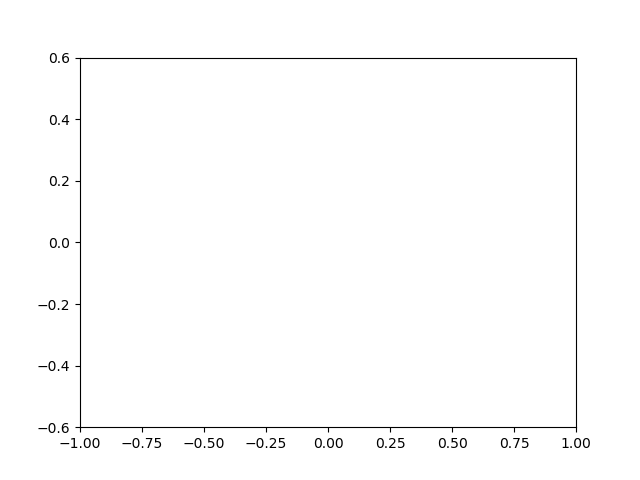

(-0.6, 0.6)

In [19]:
fig = plt.figure()
lines = plt.plot([])
line = lines[0]
plt.xlim(-1,1)
plt.ylim(-0.6,0.6)

In [20]:
def animate(i):
    #update plot
    y = sol[:, 1]
    line.set_data(x[:i],y[:i])

anim = FuncAnimation(fig,animate, frames=1000, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()